Загрузка данных и библиотек

In [ ]:
file_path <- "/content/AB_NYC_2019.csv"
dataset <- read.csv(file_path)
head(dataset, 5)

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,,NA,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
library(psych)
library(png)
library(ggplot2)
library(corrplot)
library(DMwR)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

corrplot 0.84 loaded
Loading required package: lattice
Loading required package: grid
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Предобработка данных
- Фильтрация слишком больших цен и ночей.

In [ ]:
copy <- dataset

In [ ]:
dataset <- subset(dataset, price<275)
dataset <- subset(dataset, minimum_nights<8)

In [ ]:
str(dataset)

'data.frame':	37529 obs. of  16 variables:
 $ id                            : int  2539 2595 3647 3831 5099 5178 5203 5238 5295 5441 ...
 $ name                          : Factor w/ 47906 levels "","'Fan'tastic",..: 12273 37715 44715 15291 24547 24594 15186 17272 5275 10466 ...
 $ host_id                       : int  2787 2845 4632 4869 7322 8967 7490 7549 7702 7989 ...
 $ host_name                     : Factor w/ 11453 levels "","'Cil","-TheQueensCornerLot",..: 4988 4786 2909 6205 1929 9640 6869 1230 6025 5404 ...
 $ neighbourhood_group           : Factor w/ 5 levels "Bronx","Brooklyn",..: 2 3 3 2 3 3 3 3 3 3 ...
 $ neighbourhood                 : Factor w/ 221 levels "Allerton","Arden Heights",..: 109 128 95 42 138 96 203 36 203 96 ...
 $ latitude                      : num  40.6 40.8 40.8 40.7 40.7 ...
 $ longitude                     : num  -74 -74 -73.9 -74 -74 ...
 $ room_type                     : Factor w/ 3 levels "Entire home/apt",..: 2 1 2 1 1 2 2 1 1 2 ...
 $ price         

Удаление лишних колонок

In [ ]:
dataset <- subset(dataset, select = -id)
dataset <- subset(dataset, select = -host_name)
dataset <- subset(dataset, select = -last_review)
dataset <- subset(dataset, select = -name)
dataset <- subset(dataset, select = -host_id)

Замена пропусков

In [ ]:
dataset <- replace(dataset, is.na(dataset), 0)

Первичная визуализация. Графики распределений:
- типов комнат
- районов
- цен

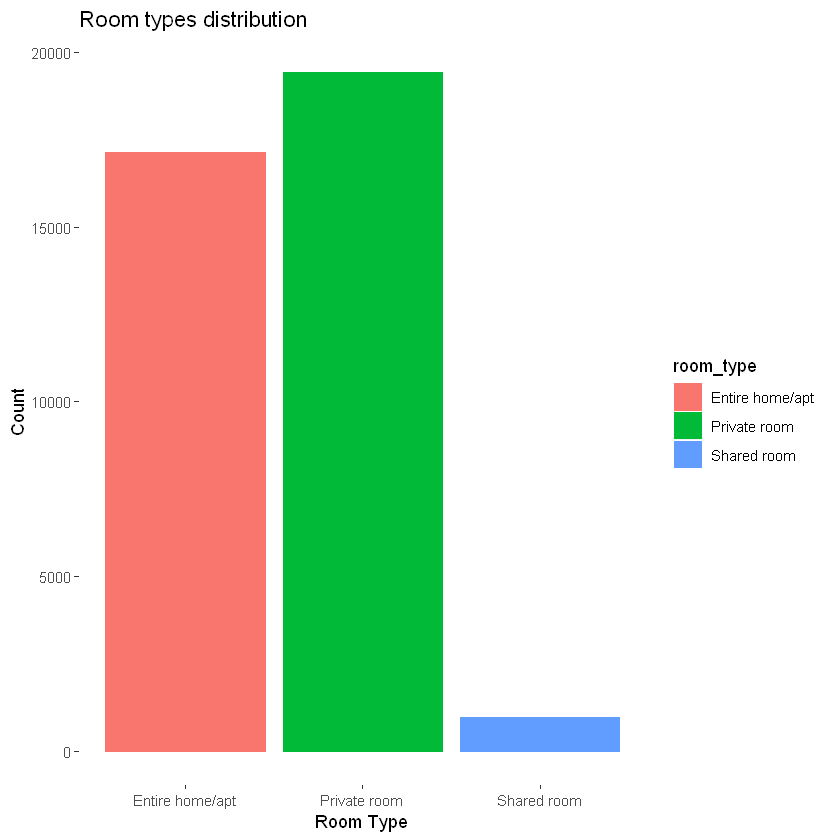

In [ ]:
ggplot(dataset, aes(x = room_type, color=room_type, fill=room_type)) +
        geom_bar() +
        labs(x = "Room Type", y = "Count", title = "Room types distribution") +
        theme(
            panel.background = element_rect(fill = "white", color = NA),
            panel.grid.major = element_blank()
        )

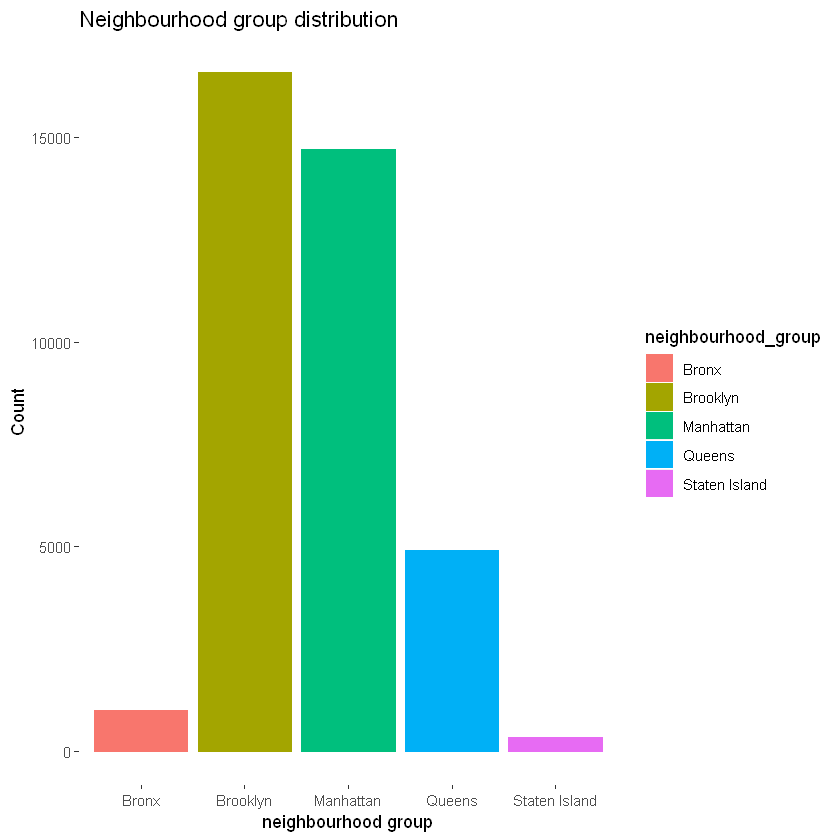

In [ ]:
ggplot(dataset, aes(x = neighbourhood_group, color=neighbourhood_group, fill=neighbourhood_group)) +
        geom_bar() +
        labs(x = "neighbourhood group", y = "Count", title = "Neighbourhood group distribution")+
        theme(panel.grid = element_blank()) +
        theme(
            panel.background = element_rect(fill = "white", color = NA),
            panel.grid.major = element_blank()
        )

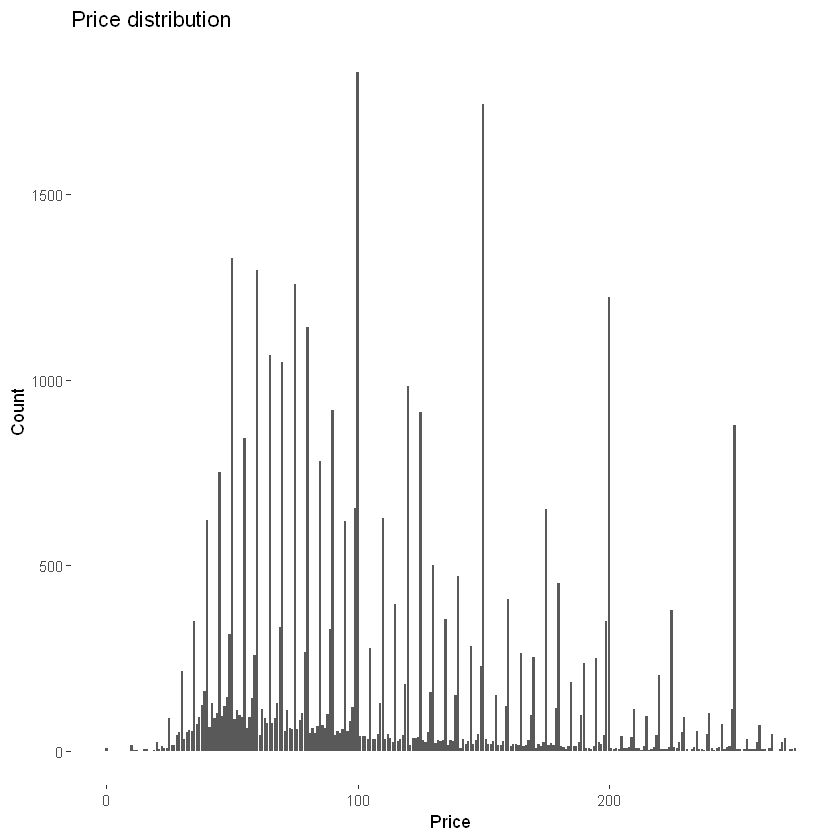

In [ ]:
ggplot(dataset, aes(x = price)) +
          geom_bar() +
          labs(x = "Price", y = "Count", title = "Price distribution") +
            theme(
                panel.background = element_rect(fill = "white", color = NA),
                panel.grid.major = element_blank()
            )

Средние значения

neighbourhood_group,price
Bronx,75.24447
Brooklyn,102.60480
Manhattan,133.68267
Queens,87.87375
Staten Island,83.83988


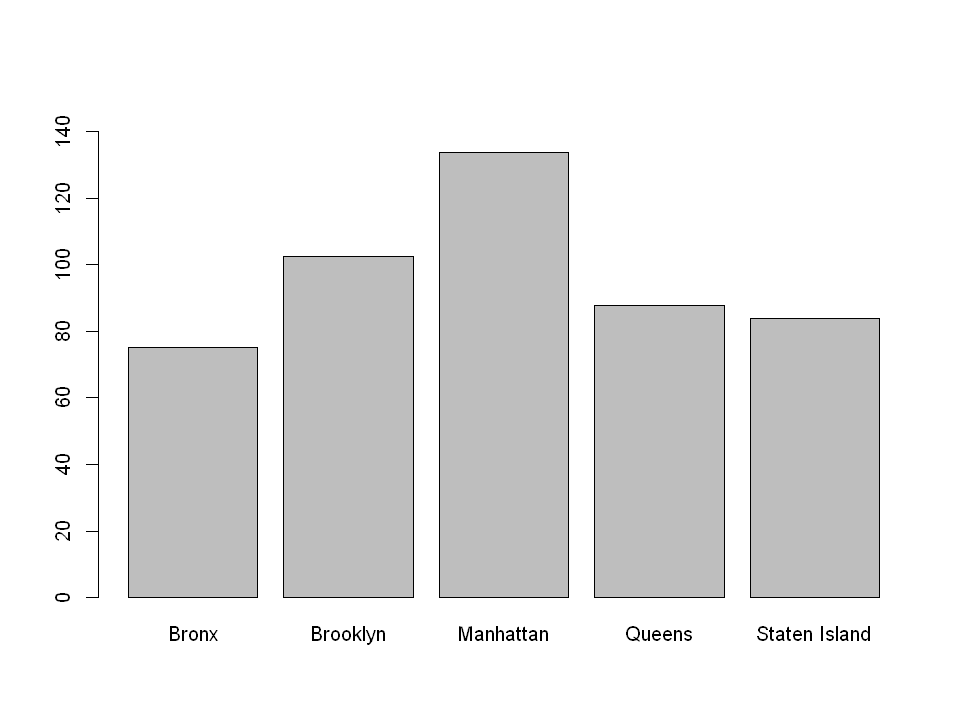

In [ ]:
avg_rent_prices <- aggregate(price ~ neighbourhood_group, data = dataset, FUN = mean)
avg_rent_prices
options(repr.plot.width=8, repr.plot.height=6)
barplot(avg_rent_prices$price, names.arg = avg_rent_prices$neighbourhood_group, ylim = c(0,150))

room_type,price
Entire home/apt,151.51479
Private room,79.60656
Shared room,60.75337


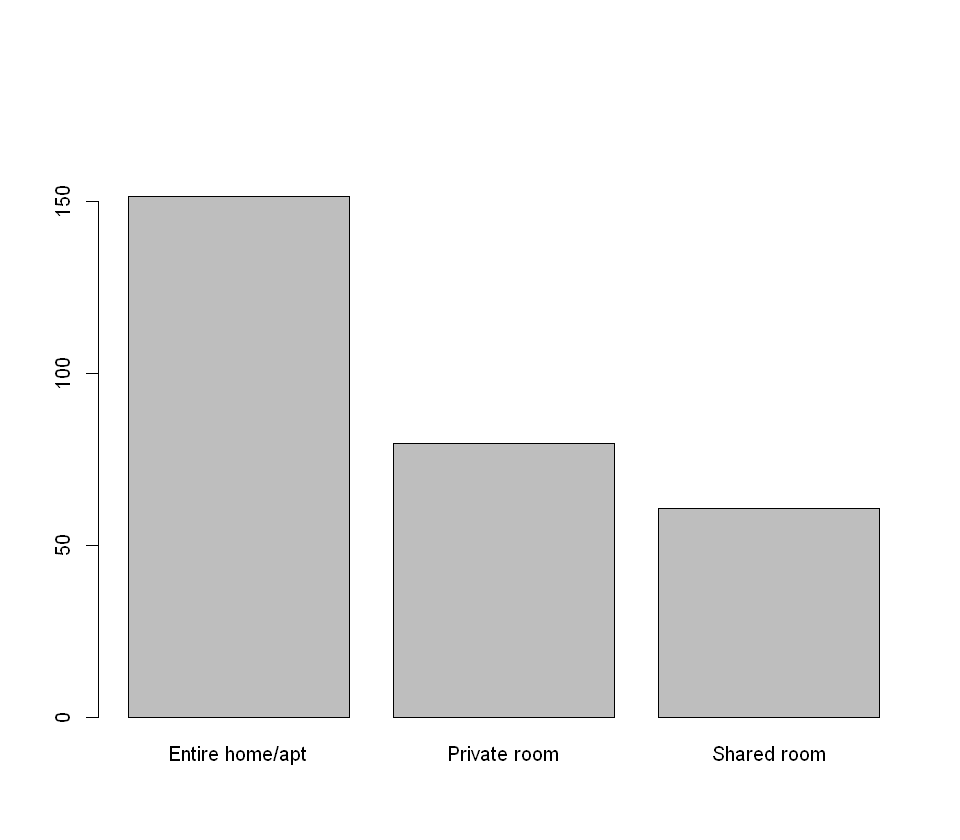

In [ ]:
avg_price_by_room_type <- aggregate(price ~ room_type, data = dataset, FUN = mean)
avg_price_by_room_type
options(repr.plot.width=8, repr.plot.height=7)
barplot(avg_price_by_room_type$price, names.arg = avg_price_by_room_type$room_type, ylim = c(0,180))

Географическая визуализация

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG"
download.file(url, destfile = "temp.png", mode = "wb")
png <- readPNG("temp.png")

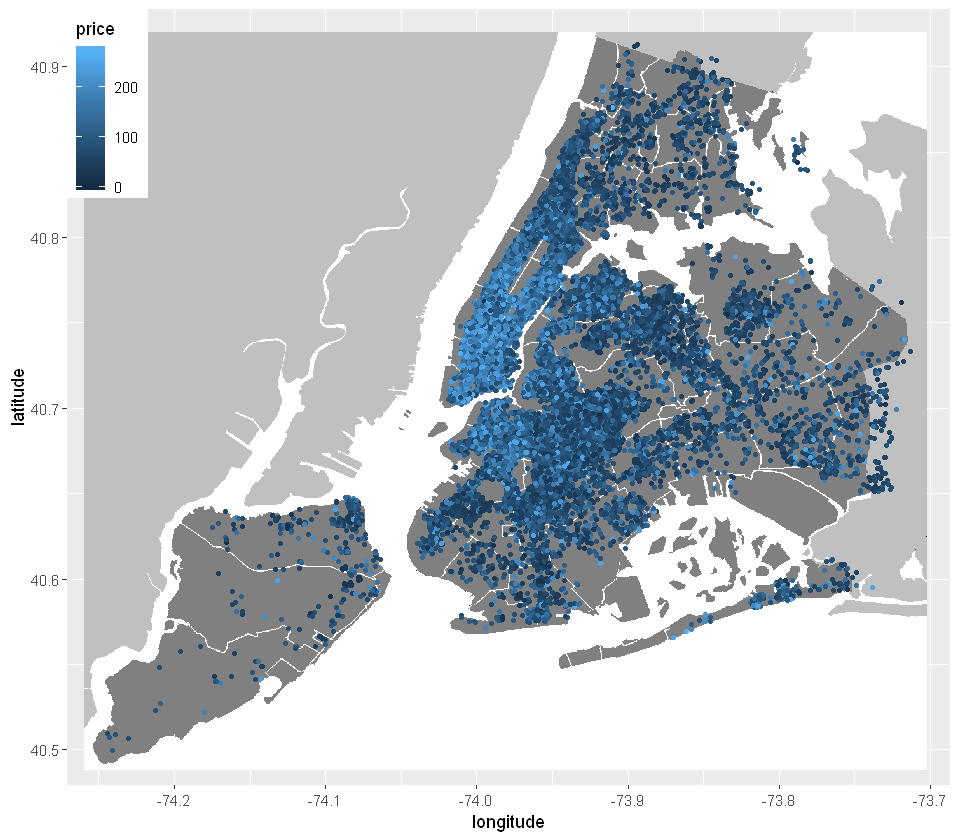

In [ ]:
ggplot(data = dataset, mapping = aes(x = longitude, y = latitude, color = price))+
        annotation_raster(png, xmin=-74.26, xmax=-73.702, ymin=40.488, ymax=40.92) +
        geom_point(size = 1)+
        theme(legend.position = c(0, 1), legend.justification = c(0, 1))

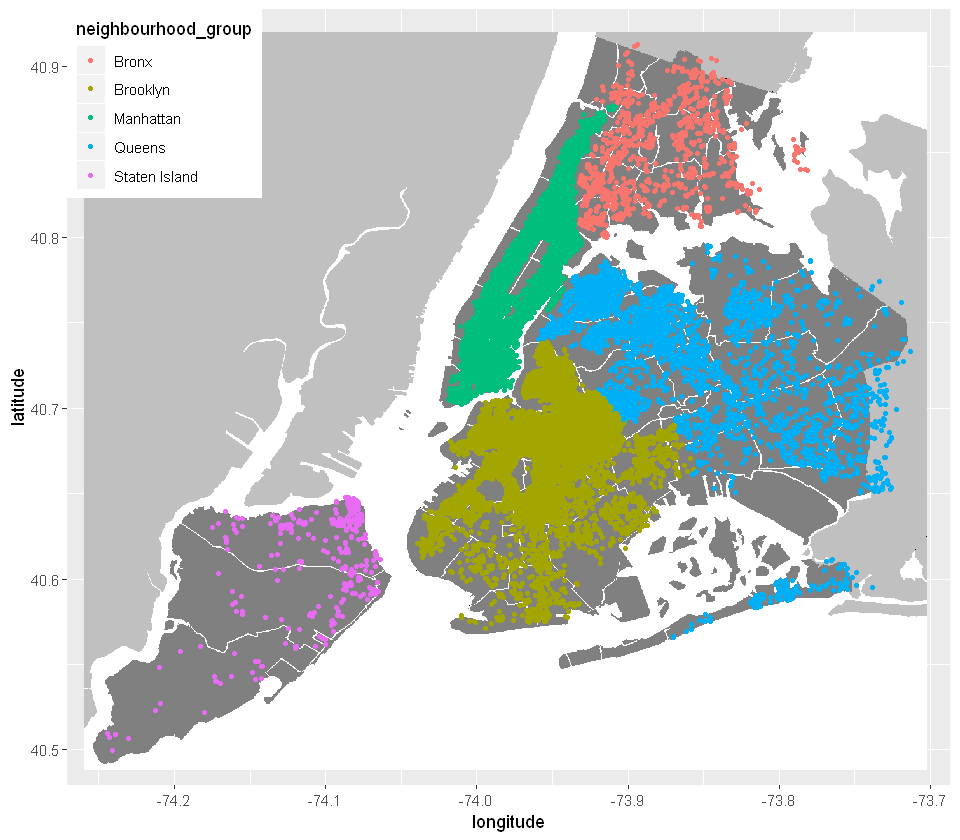

In [ ]:
ggplot(data = dataset, mapping = aes(x = longitude, y = latitude, color = neighbourhood_group ))+
        annotation_raster(png, xmin=-74.26, xmax=-73.702, ymin=40.488, ymax=40.92) +
        geom_point(size = 1)+
        theme(legend.position = c(0, 1), legend.justification = c(0, 1))

Корреляции

In [ ]:
cor_data <- dataset[, c("price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365")]

In [ ]:
correlation_matrix <- cor(cor_data)

In [ ]:
print(correlation_matrix)

                                      price minimum_nights number_of_reviews
price                           1.000000000     0.08227490       -0.01639562
minimum_nights                  0.082274897     1.00000000       -0.11896031
number_of_reviews              -0.016395621    -0.11896031        1.00000000
reviews_per_month              -0.050980588    -0.22696093        0.58568501
calculated_host_listings_count  0.110762376    -0.02896476       -0.02112296
availability_365                0.004924094    -0.09231271        0.25227011
                               reviews_per_month calculated_host_listings_count
price                                -0.05098059                     0.11076238
minimum_nights                       -0.22696093                    -0.02896476
number_of_reviews                     0.58568501                    -0.02112296
reviews_per_month                     1.00000000                     0.03665420
calculated_host_listings_count        0.03665420             

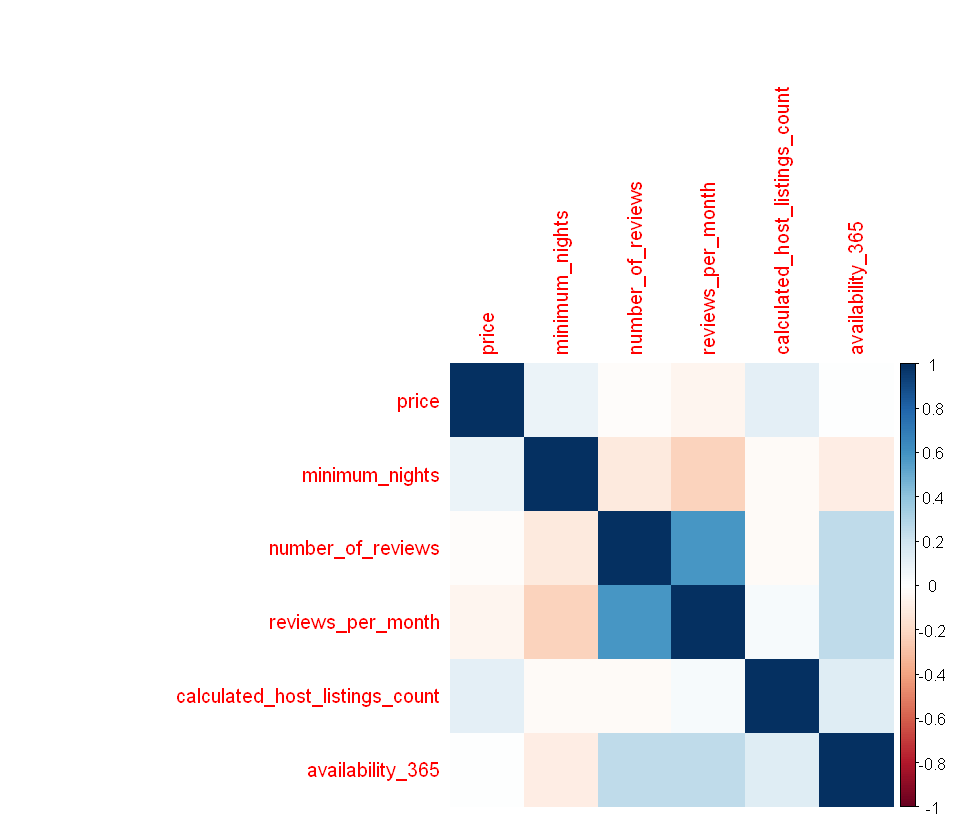

In [ ]:
corrplot(correlation_matrix, method="color")

In [ ]:
ml_data <- dataset

In [ ]:
#ml_data <- subset(ml_data, select = -latitude)
#ml_data <- subset(ml_data, select = -longitude)

In [ ]:
del_rows <- sample(1:nrow(ml_data), 100)
ml_data$price[del_rows] <- NA
sum(is.na(ml_data$price))

[1] 100

In [ ]:
del_rows2 <- sample(1:nrow(ml_data), 125)
ml_data$neighbourhood[del_rows2] <- NA
sum(is.na(ml_data$neighbourhood))

[1] 125

In [ ]:
subset(ml_data, is.na(price))

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
220,Brooklyn,Cobble Hill,40.68926,-73.99386,Entire home/apt,NA,2,222,2.12,1,279
1188,Manhattan,East Village,40.72454,-73.97944,Entire home/apt,NA,4,13,0.17,1,0
1412,Brooklyn,Bedford-Stuyvesant,40.68517,-73.95563,Entire home/apt,NA,2,85,1.02,1,338
1609,Manhattan,West Village,40.73616,-74.00400,Entire home/apt,NA,2,23,0.32,1,0
1673,Brooklyn,Bedford-Stuyvesant,40.68444,-73.95692,Entire home/apt,NA,7,1,0.02,1,0
1868,Brooklyn,Bedford-Stuyvesant,40.69380,-73.94698,Private room,NA,1,37,0.48,3,325
1974,Brooklyn,Sunset Park,40.64902,-74.00897,Private room,NA,5,43,0.56,2,282
2081,Brooklyn,Williamsburg,40.70780,-73.94827,Private room,NA,1,94,1.22,1,358
2495,Brooklyn,Bedford-Stuyvesant,40.68240,-73.95039,Private room,NA,1,127,1.77,15,318
2837,Manhattan,Greenwich Village,40.73158,-73.99254,Entire home/apt,NA,7,19,0.27,1,158


In [ ]:
subset(ml_data, is.na(neighbourhood))

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
837,Brooklyn,NA,40.73857,-73.95299,Entire home/apt,199,3,54,0.61,28,60
845,Brooklyn,NA,40.68855,-73.95405,Private room,55,5,18,0.20,3,0
2171,Manhattan,NA,40.79962,-73.96523,Private room,135,7,70,0.93,1,44
2192,Manhattan,NA,40.82153,-73.95512,Private room,52,3,163,2.17,2,0
2246,Brooklyn,NA,40.69935,-73.93713,Private room,60,2,10,0.13,2,18
2302,Brooklyn,NA,40.71852,-73.95616,Entire home/apt,175,6,32,0.43,1,291
4273,Manhattan,NA,40.76147,-73.97610,Entire home/apt,200,4,7,0.93,1,32
5058,Manhattan,NA,40.77242,-73.96212,Entire home/apt,250,7,3,0.06,1,0
5126,Manhattan,NA,40.72858,-73.99951,Entire home/apt,190,1,20,0.33,1,0
5167,Manhattan,NA,40.80257,-73.95480,Private room,200,1,0,0.00,1,0


In [ ]:
ml_data <- knnImputation(ml_data)

In [ ]:
ml_data$neighbourhood_group <- as.numeric(ml_data$neighbourhood_group)
ml_data$neighbourhood <- as.numeric(ml_data$neighbourhood)
ml_data$room_type <- as.numeric(ml_data$room_type)

In [ ]:
head(ml_data)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2,109,40.64749,-73.97237,2,149,1,9,0.21,6,365
2,3,128,40.75362,-73.98377,1,225,1,45,0.38,2,355
3,3,95,40.80902,-73.94190,2,150,3,0,0.00,1,365
4,2,42,40.68514,-73.95976,1,89,1,270,4.64,1,194
6,3,138,40.74767,-73.97500,1,200,3,74,0.59,1,129
8,3,96,40.76489,-73.98493,2,79,2,430,3.47,1,220


In [ ]:
summary(ml_data$number_of_reviews)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    7.00   26.93   29.00  629.00 

In [ ]:
sum(ml_data$number_of_reviews>100)

[1] 2777

In [ ]:
ml_data <- subset(ml_data, number_of_reviews<60)
ml_data <- subset(ml_data, calculated_host_listings_count<50)
ml_data <- subset(ml_data, reviews_per_month<3.1)

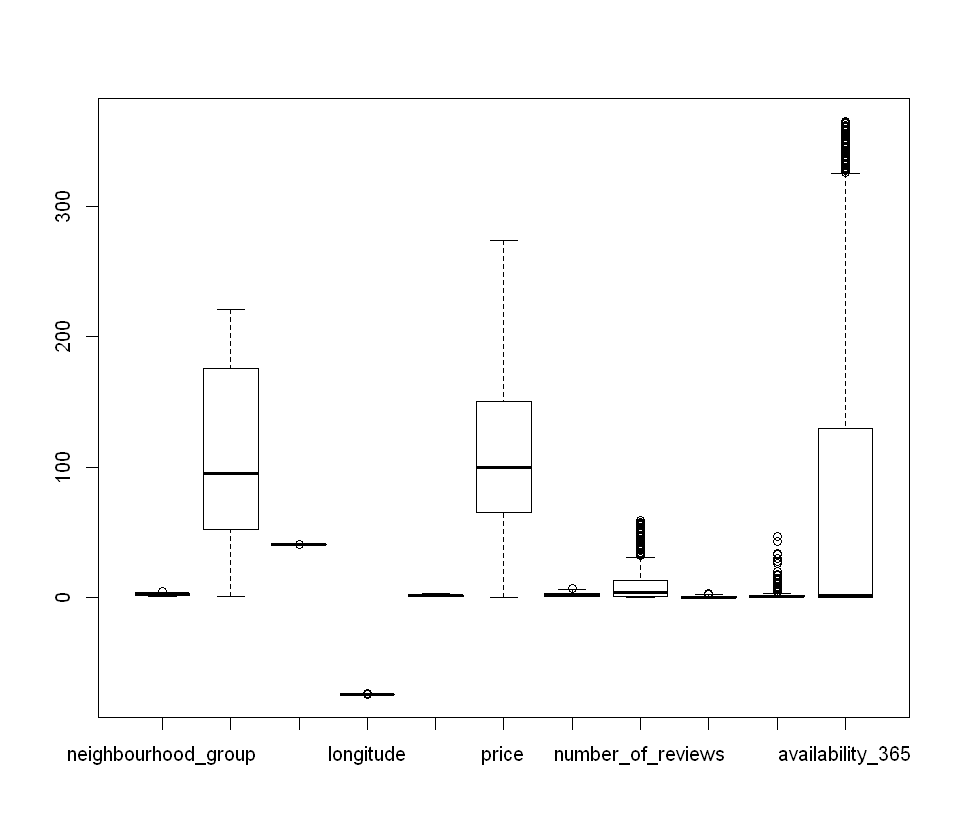

In [ ]:
boxplot(ml_data)

In [ ]:
norm_data <- as.data.frame(scale(ml_data))

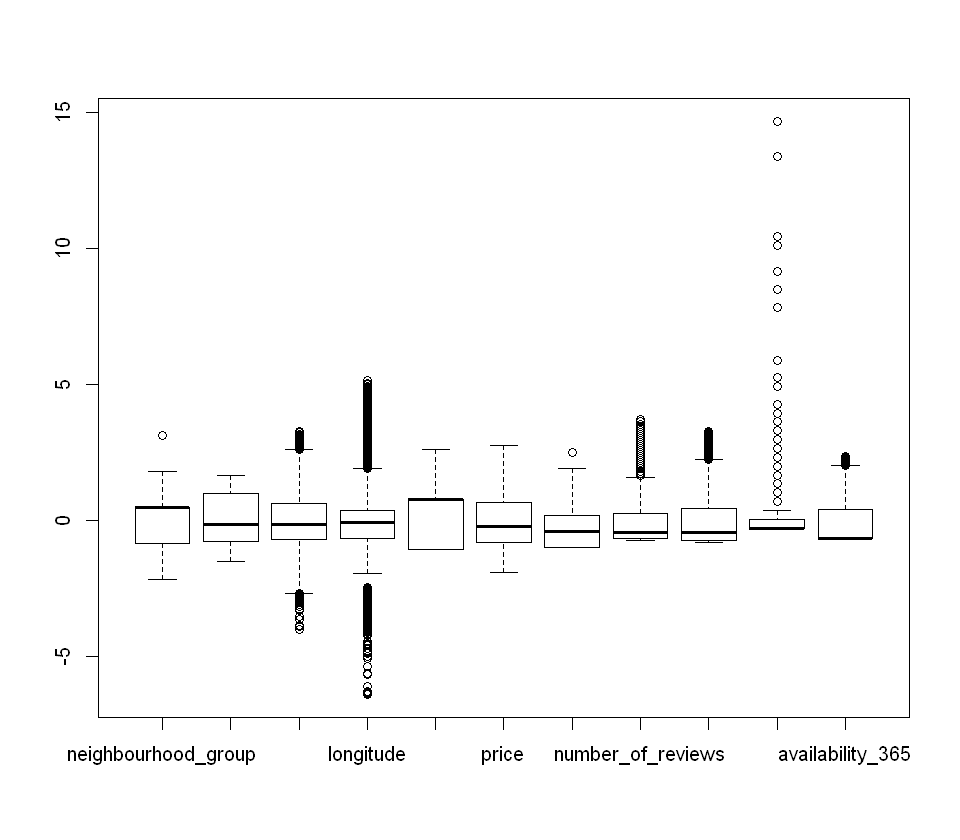

In [ ]:
boxplot(norm_data)

In [ ]:
describe(copy)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
id,1,48895,1.901714e+07,1.098311e+07,1.967728e+07,1.918806e+07,1.468996e+07,2539.00000,3.648725e+07,3.648471e+07,-0.0902518377,-1.2278180,4.966987e+04
name*,2,48895,2.396023e+04,1.381876e+04,2.392600e+04,2.395895e+04,1.772152e+04,1.00000,4.790600e+04,4.790500e+04,0.0006676103,-1.1985019,6.249377e+01
host_id,3,48895,6.762001e+07,7.861097e+07,3.079382e+07,5.417044e+07,4.083661e+07,2438.00000,2.743213e+08,2.743189e+08,1.2061399167,0.1688361,3.555093e+05
host_name*,4,48895,5.422886e+03,3.229317e+03,5.310000e+03,5.393726e+03,4.198723e+03,1.00000,1.145300e+04,1.145200e+04,0.0581790407,-1.1605534,1.460422e+01
neighbourhood_group*,5,48895,2.675345e+00,7.358158e-01,3.000000e+00,2.612547e+00,1.482600e+00,1.00000,5.000000e+00,4.000000e+00,0.3734408914,-0.1146472,3.327644e-03
neighbourhood*,6,48895,1.081137e+02,6.874455e+01,9.500000e+01,1.068102e+02,8.895600e+01,1.00000,2.210000e+02,2.200000e+02,0.2561365970,-1.2611277,3.108895e-01
latitude,7,48895,4.072895e+01,5.453008e-02,4.072307e+01,4.072728e+01,5.399629e-02,40.49979,4.091306e+01,4.132700e-01,0.2371520071,0.1485779,2.466061e-04
longitude,8,48895,-7.395217e+01,4.615674e-02,-7.395568e+01,-7.395712e+01,3.684261e-02,-74.24442,-7.371299e+01,5.314300e-01,1.2841314156,5.0206818,2.087386e-04
room_type*,9,48895,1.504060e+00,5.453790e-01,1.000000e+00,1.475420e+00,0.000000e+00,1.00000,3.000000e+00,2.000000e+00,0.4226776652,-0.9656411,2.466415e-03
price,10,48895,1.527207e+02,2.401542e+02,1.060000e+02,1.214338e+02,6.819960e+01,0.00000,1.000000e+04,1.000000e+04,19.1177659501,585.5887907,1.086070e+00


In [ ]:
ds <- subset(copy, select = -c(id, host_id, host_name, name))

In [ ]:
ds <- replace(ds, is.na(ds), 0)

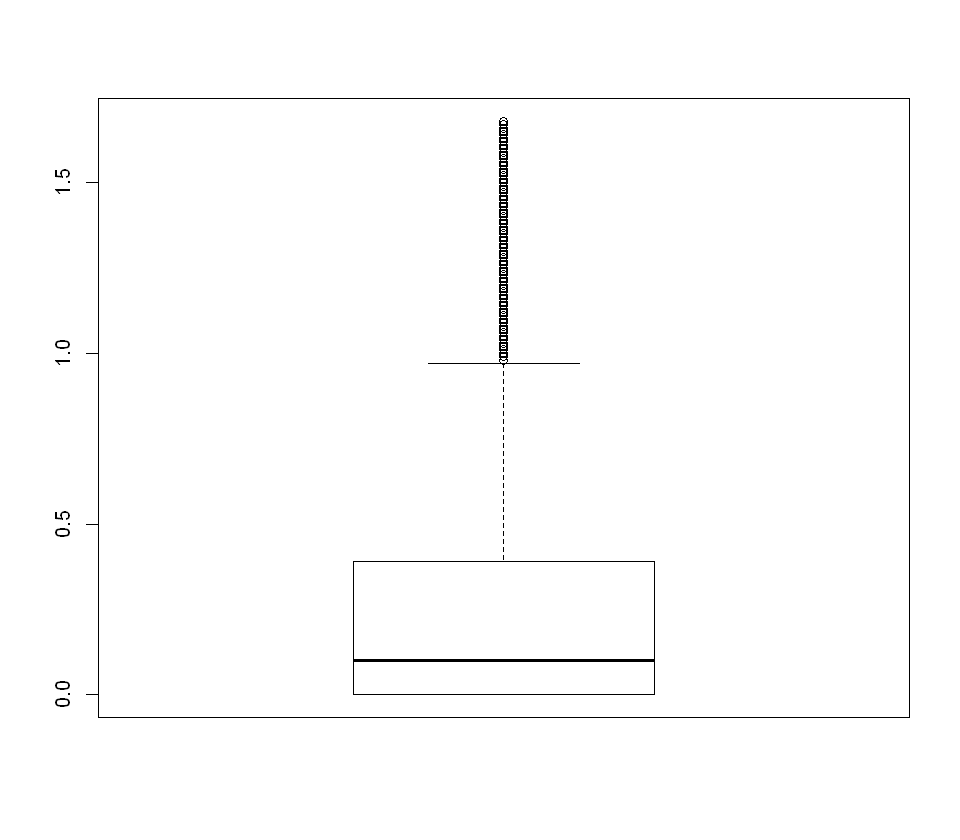

In [ ]:
boxplot(ds$reviews_per_month)

Очистка данных (через IQR)

In [ ]:
Q1 <- quantile(ds$reviews_per_month, 0.25)
Q3 <- quantile(ds$reviews_per_month, 0.75)
IQR <- Q3 - Q1

outliers <- ds$reviews_per_month < (Q1 - 1.5 * IQR) | ds$reviews_per_month > (Q3 + 1.5 * IQR)
ds <- ds[!outliers,]

In [ ]:
Q1 <- quantile(ds$number_of_reviews, 0.25)
Q3 <- quantile(ds$number_of_reviews, 0.75)
IQR <- Q3 - Q1

outliers <- ds$number_of_reviews < (Q1 - 1.5 * IQR) | ds$number_of_reviews > (Q3 + 1.5 * IQR)
ds <- ds[!outliers,]

In [ ]:
Q1 <- quantile(ds$price, 0.25)
Q3 <- quantile(ds$price, 0.75)
IQR <- Q3 - Q1

outliers <- ds$price < (Q1 - 1.5 * IQR) | ds$price > (Q3 + 1.5 * IQR)
ds <- ds[!outliers,]

In [ ]:
Q1 <- quantile(ds$minimum_nights, 0.25)
Q3 <- quantile(ds$minimum_nights, 0.75)
IQR <- Q3 - Q1

outliers <- ds$minimum_nights < (Q1 - 1.5 * IQR) | ds$minimum_nights > (Q3 + 1.5 * IQR)
ds <- ds[!outliers,]

In [ ]:
Q1 <- quantile(ds$availability_365, 0.25)
Q3 <- quantile(ds$availability_365, 0.75)
IQR <- Q3 - Q1

outliers <- ds$availability_365 < (Q1 - 1.5 * IQR) | ds$availability_365 > (Q3 + 1.5 * IQR)
ds <- ds[!outliers,]

In [ ]:
Q1 <- quantile(ds$calculated_host_listings_count, 0.25)
Q3 <- quantile(ds$calculated_host_listings_count, 0.75)
IQR <- Q3 - Q1

outliers <- ds$calculated_host_listings_count < (Q1 - 1.5 * IQR) | ds$calculated_host_listings_count > (Q3 + 1.5 * IQR)
ds <- ds[!outliers,]

In [ ]:
describe(ds)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
neighbourhood_group*,1,16533,2.6130164,0.65247574,3.00000,2.550994,1.48260000,1.00000,5.00000,4.00000,0.4313608,-0.23083664,0.0050744448
neighbourhood*,2,16533,112.0846791,70.75189808,95.00000,111.685870,88.95600000,1.00000,221.00000,220.00000,0.1941888,-1.37118000,0.5502528016
latitude,3,16533,40.7299871,0.05091510,40.72235,40.727515,0.04972640,40.52211,40.90734,0.38523,0.3925826,0.10655629,0.0003959778
longitude,4,16533,-73.9586664,0.03324808,-73.95811,-73.960640,0.03054156,-74.19626,-73.71795,0.47831,1.1100383,6.48963505,0.0002585775
room_type*,5,16533,1.4570858,0.52327872,1.00000,1.430332,0.00000000,1.00000,3.00000,2.00000,0.4401678,-1.20731312,0.0040696517
price,6,16533,122.0578237,65.85301764,104.00000,115.034777,65.23440000,0.00000,330.00000,330.00000,0.8400306,0.07277676,0.5121531497
minimum_nights,7,16533,3.0490534,2.10729061,2.00000,2.712180,1.48260000,1.00000,12.00000,11.00000,1.3691574,1.87514602,0.0163888545
number_of_reviews,8,16533,6.0618762,9.50982816,2.00000,3.827474,2.96520000,0.00000,58.00000,58.00000,2.6108947,7.56690540,0.0739599888
last_review*,9,16533,901.6450130,673.09962081,1018.00000,908.144326,926.62500000,1.00000,1765.00000,1764.00000,-0.1761726,-1.53340886,5.2348412148
reviews_per_month,10,16533,0.2752985,0.37800225,0.10000,0.194540,0.14826000,0.00000,1.68000,1.68000,1.7062563,2.19248398,0.0029398052


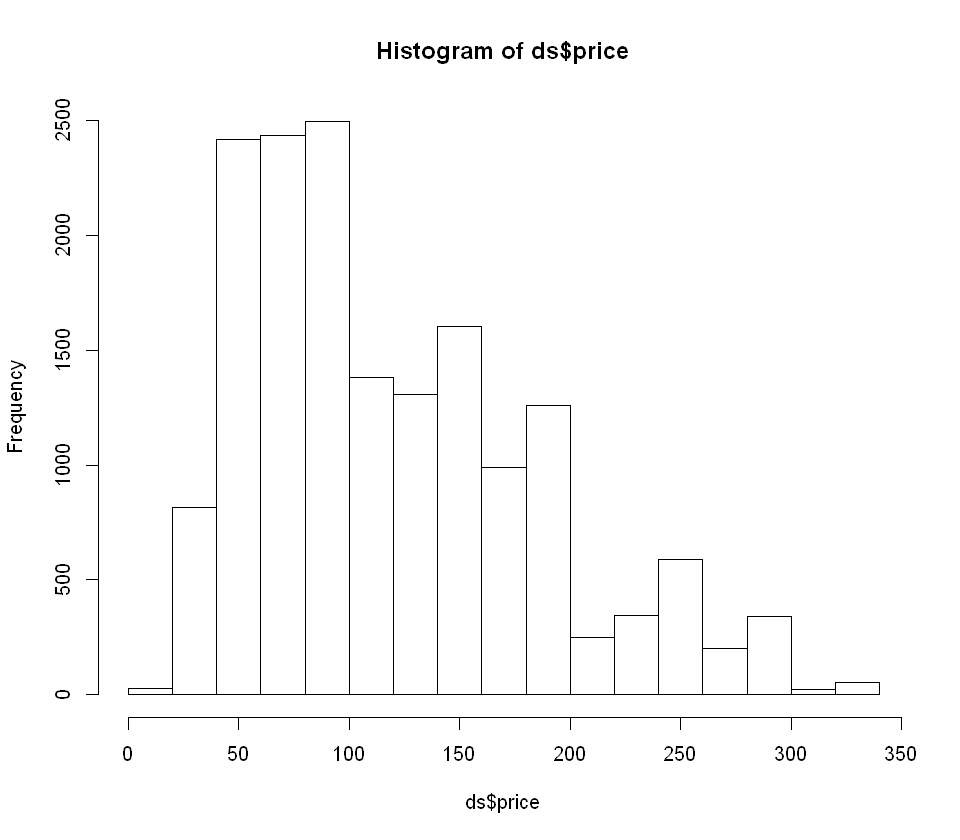

In [ ]:
hist(ds$price)